<a href="https://colab.research.google.com/github/ThumbRocket/AI_Expert_Lecture_Files/blob/main/%5BSamsung_AI_Expert_Day3%5D_TF_IDF_similarity_search_(Student).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Information Retrieval with TF-IDF

This lab session will guide you through implementing the TF-IDF (Term Frequency-Inverse Document Frequency) weighting scheme from scratch and applying it to analyze question similarity in the Quora Question Pairs dataset.

### Objectives

- Understand and implement TF-IDF.
- Use the TF-IDF vectors to determine the similarity between different questions in the Quora dataset.
- Evaluate the effectiveness of TF-IDF for identifying duplicate questions.

## Understanding and Implementing TF-IDF

#### Introduction to TF-IDF

TF-IDF stands for Term Frequency-Inverse Document Frequency, a commonly used technique in text mining and information retrieval. It reflects how important a word is to a document in a collection or corpus.

#### Step 1: Load the Data

We'll start by loading the Quora Question Pairs dataset. Make sure you have downloaded it from [our google drive](https://drive.google.com/file/d/1BQLCbKrUNTta97xJSdBg1X_G5A82Heng/view?usp=sharing) and placed it in a suitable directory.

In [1]:
!wget -O train_compact.csv https://drive.google.com/uc?id=1P4zAI3STvY8lZmwvnAJY_4ZU_q03v6Gl

--2024-07-09 00:39:34--  https://drive.google.com/uc?id=1P4zAI3STvY8lZmwvnAJY_4ZU_q03v6Gl
Resolving drive.google.com (drive.google.com)... 142.250.101.138, 142.250.101.139, 142.250.101.100, ...
Connecting to drive.google.com (drive.google.com)|142.250.101.138|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1P4zAI3STvY8lZmwvnAJY_4ZU_q03v6Gl [following]
--2024-07-09 00:39:34--  https://drive.usercontent.google.com/download?id=1P4zAI3STvY8lZmwvnAJY_4ZU_q03v6Gl
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 142.251.2.132, 2607:f8b0:4023:c0d::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|142.251.2.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2954984 (2.8M) [application/octet-stream]
Saving to: ‘train_compact.csv’

train_compact.csv   100%[===================>]   2.82M  --.-KB/s    in 0.1s    

2024-07-09 00:39:35 (20.4 

In [2]:
import pandas as pd

# Load the dataset
data = pd.read_csv('./train_compact.csv')
# Limit the size
M = 3000
N = 2*M
data = data.head(M)
data.head()

<ipython-input-2-6da23efc7b0b>:4: DtypeWarning: Columns (3,4) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('./train_compact.csv')


,id,qid1,qid2,question1,question2,is_duplicate
0,0.0,1.0,2.0,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0.0
1,1.0,3.0,4.0,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0.0
2,2.0,5.0,6.0,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0.0
3,3.0,7.0,8.0,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0.0
4,4.0,9.0,10.0,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0.0


In [3]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

#### Step 2: Preprocess the Data

We need to preprocess the questions to convert them to a suitable format for TF-IDF calculation. This includes converting text to lowercase, removing punctuation, and tokenizing.

In [4]:
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

def preprocess(text):
    # Lowercasing
    text = str(text).lower()

    # Remove non-alphanumeric characters
    text = re.sub(r'\W', ' ', text)
    # Tokenization
    tokens = word_tokenize(text)
    # Removing stopwords
    tokens = [word for word in tokens if not word in stop_words]
    return tokens

# Apply preprocessing
data['question1'] = data['question1'].apply(preprocess)
data['question2'] = data['question2'].apply(preprocess)

data.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0.0,1.0,2.0,"[step, step, guide, invest, share, market, india]","[step, step, guide, invest, share, market]",0.0
1,1.0,3.0,4.0,"[story, kohinoor, koh, noor, diamond]","[would, happen, indian, government, stole, koh...",0.0
2,2.0,5.0,6.0,"[increase, speed, internet, connection, using,...","[internet, speed, increased, hacking, dns]",0.0
3,3.0,7.0,8.0,"[mentally, lonely, solve]","[find, remainder, math, 23, 24, math, divided,...",0.0
4,4.0,9.0,10.0,"[one, dissolve, water, quikly, sugar, salt, me...","[fish, would, survive, salt, water]",0.0


#### Step 3: Calculate Term Frequency (TF)

Term frequency is the ratio of the count of a word present in a sentence, to the length of the sentence.
We apply log frequency weighting as we learned in lecture slides.

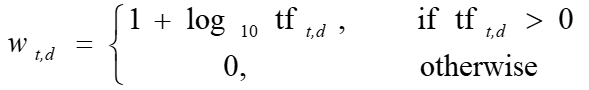

In [6]:
from math import log10

# Compute tf of each word, make it to dictionary
def compute_tf(tokens):
    # DIY
    # Count frequency of each word
    word_count = {}
    term_freq = {}
    # Your Code Here
    for word in tokens:
        if word in word_count:
          word_count[word] += 1
        else:
          word_count[word] = 1

    # DIY
    # Log frequency weighting (with base 10)
    # Your Code Here
    for word in word_count:
      term_freq[word] = log10(1 + word_count[word])


    return term_freq

data['tf_q1'] = data['question1'].apply(compute_tf)
data['tf_q2'] = data['question2'].apply(compute_tf)
data[['tf_q1', 'tf_q2']].head()

,tf_q1,tf_q2
0,"{'step': 0.47712125471966244, 'guide': 0.30102...","{'step': 0.47712125471966244, 'guide': 0.30102..."
1,"{'story': 0.3010299956639812, 'kohinoor': 0.30...","{'would': 0.3010299956639812, 'happen': 0.3010..."
2,"{'increase': 0.3010299956639812, 'speed': 0.30...","{'internet': 0.3010299956639812, 'speed': 0.30..."
3,"{'mentally': 0.3010299956639812, 'lonely': 0.3...","{'find': 0.3010299956639812, 'remainder': 0.30..."
4,"{'one': 0.3010299956639812, 'dissolve': 0.3010...","{'fish': 0.3010299956639812, 'would': 0.301029..."


#### Step 4: Calculate Document Frequency (DF) and Inverse Document Frequency (IDF)

Document frequency is the number of documents a word appears in. IDF is calculated as the log of the ratio of total documents to the document frequency, as we covered in lecture slides.

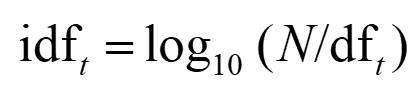

In [7]:
import numpy as np

# Compute df of each word, make it to dictionary
def compute_document_frequency(series):
    # Create a set of unique words for each document
    word_set = set().union(*series)
    # DIY
    # Calculate document frequency

    # Your Code Here
    df_dict = {word:0 for word in word_set}
    for document in series:
      for word in document:
        df_dict[word] += 1

    return df_dict

def compute_idf(df_dict):
    # DIY
    # Calculate inverse document frequency
    idf_dict = {word:log10(N/df_dict[word]) for word in df_dict} # Your Code Here
    return idf_dict

# Compute document frequency for all questions
all_questions = pd.concat([data['question1'], data['question2']])
df_dict = compute_document_frequency(all_questions)

# Compute IDF
idf_dict = compute_idf(df_dict)

# Show first five examples
print('IDF Dictionary:')
for i, (word, idf) in enumerate(idf_dict.items()):
    print(f'{word}: {idf}')
    if i > 4:
        break

IDF Dictionary:
temples: 3.1760912590556813
decreasing: 3.3010299956639813
guillotine: 3.778151250383644
retrieve: 3.0791812460476247
category: 3.778151250383644
tube: 3.778151250383644


#### Step 5: Compute TF-IDF Scores

The TF-IDF score is simply the product of TF and IDF.

In [8]:
def compute_tf_idf(tf_dict, idf_dict):
    tf_idf_dict = {}
    # DIY
    # Your Code Here
    for word in tf_dict:
      tf_idf_dict[word] = tf_dict[word] * idf_dict[word]

    return tf_idf_dict

# Show TF-IDF values
data['tf_idf_q1'] = data['tf_q1'].apply(compute_tf_idf, args=(idf_dict,))
data['tf_idf_q2'] = data['tf_q2'].apply(compute_tf_idf, args=(idf_dict,))
data[['tf_idf_q1', 'tf_idf_q2']].head()

,tf_idf_q1,tf_idf_q2
0,"{'step': 1.2557942186515227, 'guide': 1.046717...","{'step': 1.2557942186515227, 'guide': 1.046717..."
1,"{'story': 0.7523936635707229, 'kohinoor': 1.04...","{'would': 0.45989293098367046, 'happen': 0.658..."
2,"{'increase': 0.672526057825198, 'speed': 0.759...","{'internet': 0.7332273607337145, 'speed': 0.75..."
3,"{'mentally': 1.046717796231397, 'lonely': 1.04...","{'find': 0.5565238836790766, 'remainder': 1.13..."
4,"{'one': 0.47220655927358385, 'dissolve': 1.137...","{'fish': 1.046717796231397, 'would': 0.4598929..."


### Applying TF-IDF to Question Similarity

#### Step 6: Calculate Cosine Similarity

We will now calculate the cosine similarity between question pairs to find out how similar they are.

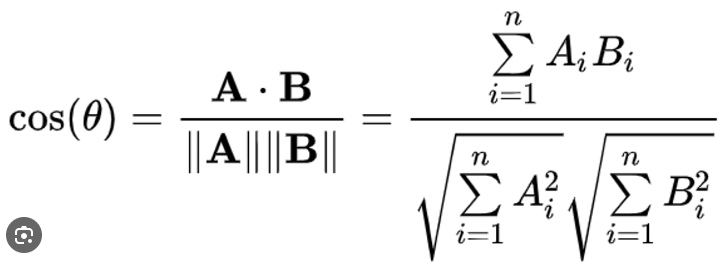

In [9]:
from sklearn.metrics.pairwise import cosine_similarity

# Convert TF-IDF dictionaries to vectors for comparison
def tf_idf_to_vector(tf_idf_dict, idf_index):
    return np.array([tf_idf_dict.get(word, 0) for word in idf_index])

idf_index = list(idf_dict.keys())
vectors_q1 = data['tf_idf_q1'].apply(lambda x: tf_idf_to_vector(x, idf_index))
vectors_q2 = data['tf_idf_q2'].apply(lambda x: tf_idf_to_vector(x, idf_index))

# Calculate cosine similarity
data['cosine_similarity'] = [
    cosine_similarity([v1], [v2])[0][0] for v1, v2 in zip(vectors_q1, vectors_q2)
]
data[['cosine_similarity']].head()

,cosine_similarity
0,0.980662
1,0.727736
2,0.261185
3,0.000000
4,0.224548


In [10]:
# Show Document-Term Matrix for TF-IDF (q1)
# Row represents word (str), column represents document (q1)
DTM_tp = pd.DataFrame(vectors_q1.values.tolist(), columns=idf_index)
DTM = DTM_tp.transpose()
DTM.head()

,0,1,2,3,4,5,6,7,8,9,...,2990,2991,2992,2993,2994,2995,2996,2997,2998,2999
temples,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
decreasing,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
guillotine,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
retrieve,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
category,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
# Show the rows of DTM where column 0 is non-zero
DTM[DTM.iloc[:, 0] != 0]

,0,1,2,3,4,5,6,7,8,9,...,2990,2991,2992,2993,2994,2995,2996,2997,2998,2999
india,0.424692,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.424692,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
step,1.255794,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
invest,0.792318,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
market,0.774861,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
guide,1.046718,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
share,0.792318,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Step 7: Evaluate the Model

Finally, we evaluate how well our TF-IDF based similarity measurement correlates with the duplicate labels in the dataset.

In [12]:
# Assume a threshold to determine duplicates
threshold = 0.6
data['predicted_duplicate'] = data['cosine_similarity'] > threshold
true_labels = data['is_duplicate']

# Calculate Accuracy
accuracy = (data['predicted_duplicate'] == true_labels).mean()
print('Accuracy:', accuracy)

Accuracy: 0.6753333333333333


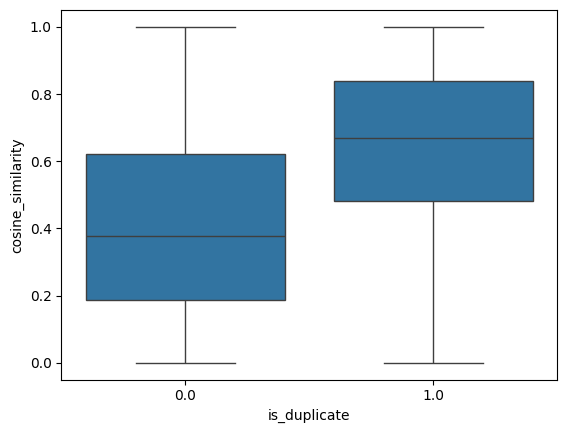

In [13]:
# See if the distribution of cosine similarity differs at each case
# Draw boxplot
import matplotlib.pyplot as plt
import seaborn as sns

sns.boxplot(x='is_duplicate', y='cosine_similarity', data=data)
plt.show()

### Applying TF-IDF for Retrieval

#### Step 8: Retrieve Questions with Highest Cosine Similarity

Now that we have seen that cosine similarity among TF-IDF vectors indicates semantic similarity, we now apply it for retrieval. The code below shows how to retrieve similar questions for a specific target question.

In [14]:
# Retrieve similar questions for the given query
# Use TF-IDF vectors and cosine similarity

# Load the dataset
data_raw = pd.read_csv('./train_compact.csv')
data_raw = data_raw.head(M)

<ipython-input-14-825790177918>:5: DtypeWarning: Columns (3,4) have mixed types. Specify dtype option on import or set low_memory=False.
  data_raw = pd.read_csv('./train_compact.csv')


In [15]:
data_raw.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0.0,1.0,2.0,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0.0
1,1.0,3.0,4.0,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0.0
2,2.0,5.0,6.0,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0.0
3,3.0,7.0,8.0,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0.0
4,4.0,9.0,10.0,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0.0


In [17]:
target_query_id = 0
target_query = data_raw.iloc[target_query_id]['question1']
target_query

'What is the step by step guide to invest in share market in india?'

In [18]:
# Find top-5 questions that is similar to target_query
# Use cosine similarity

target_vector = vectors_q1[target_query_id].reshape(1, -1)
# integrate vectors_q1 and vectors_q2
vectors_integ = np.concatenate([vectors_q1, vectors_q2], axis=0)
# make array from vectors_q1
_vectors_integ = np.array([vectors_integ[query_id] for query_id in range(len(vectors_integ))])

print(target_vector.shape)
print(_vectors_integ.shape)
similarities = cosine_similarity(target_vector, _vectors_integ)
top_indices = similarities.argsort()[0][-5:][::-1]

(1, 7642)
(6000, 7642)


In [21]:
target_vector

array([[0., 0., 0., ..., 0., 0., 0.]])

In [19]:
# Show the questions with top similarities
for i, idx in enumerate(top_indices):
    if idx < M:
      print(f'Question {i+1} ({similarities[0][idx]}): {data_raw.iloc[idx]["question1"]}')
    else:
      print(f'Question {i+1} ({similarities[0][idx]}): {data_raw.iloc[idx-M]["question2"]}')

Question 1 (1.0): What is the step by step guide to invest in share market in india?
Question 2 (0.9806619076728581): What is the step by step guide to invest in share market?
Question 3 (0.4104057660826803): How do you draw a cat step-by-step?
Question 4 (0.3927618641251492): How do you draw an angel step-by-step?
Question 5 (0.3383577247193071): What is next step after demonetization?
